<h3>Visualization</h3>

<p>This chapter is presented in three sections. The first introduces you to the general concepts
of programming visualizations with pandas, emphasizing the process of creating timeseries
charts. We will also dive into techniques to label axes and create legends, colors,
line styles, and markets.</p><p>
The second part of the chapter will then focus on the many types of data visualizations
commonly used in pandas programs and data sciences, including:</p><ul>
<li>Bar plots</li>
<li>Histograms</li>
<li>Box and whisker charts</li>
<li>Area plots</li>
<li>Scatter plots</li>
<li>Density plots</li>
<li>Scatter plot matrixes</li>
<li>Heatmaps</li>
    </ul><p>
The final section will briefly look at creating composite plots by dividing plots into
subparts and drawing multiple plots within a single graphical canvas.</p>

In [2]:
# import pandas, numpy and datetime
import numpy as np
import pandas as pd

# needed for representing dates and times
import datetime
from datetime import datetime

# Set some pandas options for controlling output
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

# used for seeding random number sequences
seedval = 111111

# matplotlib
import matplotlib as mpl
# matplotlib plotting functions
import matplotlib.pyplot as plt

# we want our plots inline
%matplotlib inline

<p>The %matplotlib inline line is the statement that tells matplotlib to produce inline
graphics. This will make the resulting graphs appear either inside your IPython notebook
or IPython session.</p><p>
All examples will seed the random number generator with 111111, so that the graphs
remain the same every time they run, and so that the reader can reproduce the same charts
as in the book.</p>

<p>The pandas library itself performs data manipulation. It does not provide data visualization
capabilities itself. The visualization of data in pandas data structures is handed off by
pandas to other robust visualization libraries that are part of the Python ecosystem, most
commonly, matplotlib, which is what we will use in this chapter.</p><p>
All of the visualizations and techniques covered in this chapter can be performed without
pandas. These techniques are all available independently in matplotlib. pandas tightly
integrates with matplotlib, and by doing this, it is very simple to go directly from pandas
data to a matplotlib visualization without having to work with intermediate forms of data.</p><p>
pandas does not draw the graphs, but it will tell matplotlib how to draw graphs using
pandas data, taking care of many details on your behalf, such as automatically selecting
Series for plots, labeling axes, creating legends, and defaulting color. Therefore, you
often have to write very little code to create stunning visualizations.</p>

<h3>Creating time-series charts with .plot()</h3>

One of the most common data visualizations created, is of the time-series data. Visualizing
a time series in pandas is as simple as calling .plot() on a DataFrame or Series object.
To demonstrate, the following creates a time series representing a random walk of values
over time, akin to the movements in the price of a stock:

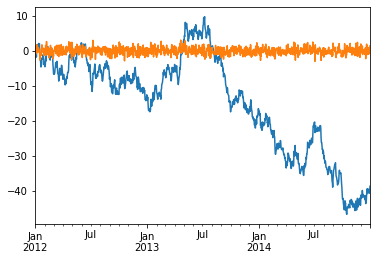

In [12]:
# generate a random walk time-series
np.random.seed(seedval)
s = pd.Series(np.random.randn(1096), index=pd.date_range('2012-01-01','2014-12-31'))
walk_ts = s.cumsum()

# this plots the walk - just that easy :)
walk_ts.plot();
s.plot();

<h4>Note</h4><p>
The ; character at the end suppresses the generation of an IPython out tag, as well as the
trace information.</p>

It is a common practice to execute the following statement to produce plots that have a
richer visual style. This sets a pandas option that makes resulting plots have a shaded
background and what is considered a slightly more pleasing style:

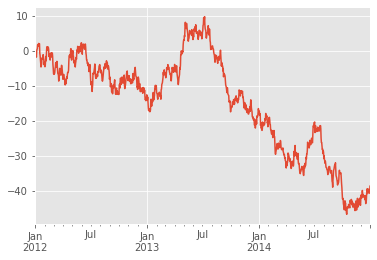

In [15]:
# tells pandas plots to use a default style
# which has a background fill
mpl.style.use('ggplot')
walk_ts.plot();

<p>The .plot() method on pandas objects is a wrapper function around the matplotlib
libraries’ plot() function. It makes plots of pandas data very easy to create. It is coded to
know how to use the data in the pandas objects to create the appropriate plots for the data,
handling many of the details of plot generation, such as selecting series, labeling, and axes
generation. In this situation, the .plot() method determines that as Series contains dates
for its index that the x axis should be formatted as dates and it selects a default color for
the data.</p><p>This example used a single series and the result would be the same using DataFrame with
a single column. As an example, the following produces the same graph with one small
difference. It has added a legend to the graph, which charts by default, generated from a
DataFrame object, will have a legend even if there is only one series of data:</p>

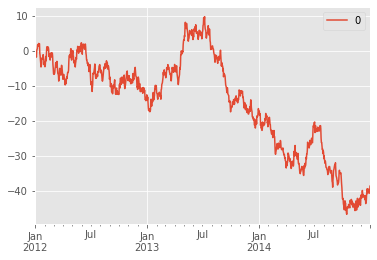

In [16]:
# a DataFrame with a single column will produce
# the same plot as plotting the Series it is created from
walk_df = pd.DataFrame(walk_ts)
walk_df.plot();

The .plot() function is smart enough to know whether DataFrame has multiple columns,
and it should create multiple lines/series in the plot and include a key for each, and also
select a distinct color for each line. This is demonstrated with the following example:

In [19]:
# generate two random walks, one in each of
# two columns in a DataFrame
np.random.seed(seedval)
df = pd.DataFrame(np.random.randn(1096, 2), index=walk_ts.index, columns=list('AB'))
walk_df = df.cumsum()
walk_df

                    A         B
2012-01-01  -1.878324  1.362367
2012-01-02  -2.804186  1.427261
2012-01-03  -3.241758  3.165368
2012-01-04  -2.750550  3.332685
2012-01-05  -1.620667  2.930017
...               ...       ...
2014-12-27 -20.952692  4.689279
2014-12-28 -20.476150  3.965521
2014-12-29 -21.250542  4.243064
2014-12-30 -19.930892  6.237730
2014-12-31 -19.016886  3.836418

[1096 rows x 2 columns]

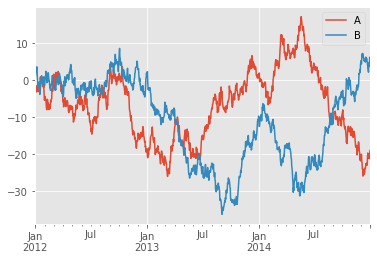

In [18]:
# plot the DataFrame, which will plot a line
# for each column, with a legend
walk_df.plot();

If you want to use one column of DataFrame as the labels on the x axis of the plot instead
of the index labels, you can use the x and y parameters to the .plot() method, giving the x
parameter the name of the column to use as the x axis and y parameter the names of the
columns to be used as data in the plot. The following recreates the random walks as
columns 'A' and 'B', creates a column 'C' with sequential values starting with 0, and
uses these values as the x axis labels and the 'A' and 'B' columns values as the two
plotted lines:

In [21]:
# copy the walk
df2 = walk_df.copy()

# add a column C which is 0 .. 1096
df2['C'] = pd.Series(np.arange(0, len(df2)), index=df2.index)

df2

                    A         B     C
2012-01-01  -1.878324  1.362367     0
2012-01-02  -2.804186  1.427261     1
2012-01-03  -3.241758  3.165368     2
2012-01-04  -2.750550  3.332685     3
2012-01-05  -1.620667  2.930017     4
...               ...       ...   ...
2014-12-27 -20.952692  4.689279  1091
2014-12-28 -20.476150  3.965521  1092
2014-12-29 -21.250542  4.243064  1093
2014-12-30 -19.930892  6.237730  1094
2014-12-31 -19.016886  3.836418  1095

[1096 rows x 3 columns]

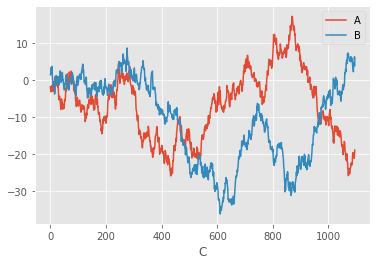

In [22]:
# instead of dates on the x axis, use the 'C' column,
# which will label the axis with 0..1000
df2.plot(x='C', y=['A', 'B']);

<h3>Adorning and styling your time-series plot</h3>

<h4>Adding a title and changing axes labels</h4>

The title of the chart can be set using the title parameter of the .plot() method. Axes
labels are not set with .plot(), but by directly using the plt.ylabel() and plt.xlabel()
functions after calling .plot():

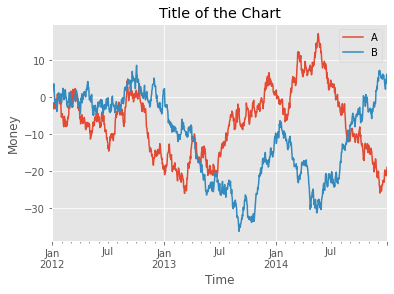

In [24]:
# create a time-series chart with a title and specific
# x and y axes labels
# the title is set in the .plot() method as a parameter
walk_df.plot(title='Title of the Chart')

# explicitly set the x and y axes labels after the .plot()
plt.xlabel('Time')
plt.ylabel('Money');

<p>The labels in this plot were added after the call to .plot(). A question that may be asked,
is that if the plot is generated in the call to .plot(), then how are they changed on the
plot?</p><p>
The answer, is that plots in matplotlib are not displayed until either .show() is called on
the plot or the code reaches the end of the execution and returns to the interactive prompt.</p><p>
At either of these points, any plot generated by plot commands will be flushed out to the
display. In this example, although .plot() is called, the plot is not generated until the
IPython notebook code section finishes completion, so the changes for labels and title are
added to the plot.</p>

<h4>Specifying the legend content and position</h4>

To change the text used in the legend (the default is the column name from DataFrame),
you can use the ax object returned from the .plot() method to modify the text using its
.legend() method. The ax object is an AxesSubplot object, which is a representation of
the elements of the plot, that can be used to change various aspects of the plot before it is
generated:

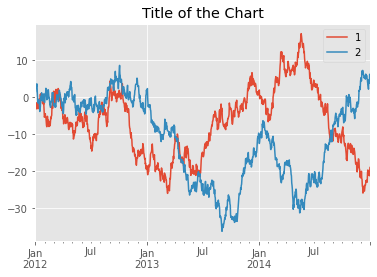

In [27]:
# change the legend items to be different
# from the names of the columns in the DataFrame
ax = walk_df.plot(title='Title of the Chart')

# this sets the legend labels
ax.legend(['1', '2']);

The location of the legend can be set using the loc parameter of the .legend() method.
By default, pandas sets the location to 'best', which tells matplotlib to examine the data
and determine the best place to put the legend. However, you can also specify any of the
following to position the legend more specifically (you can use either the string or the
numeric code):

<table>
    <tr><th>Text</th><th>Code</th></tr>
    <tr><td>'best'<td><td>0</td></tr>
<tr><td>'upper right'<td><td>1</td></tr>
<tr><td>'upper left'<td><td>2</td></tr>
<tr><td>'lower left'<td><td>3</td></tr>
<tr><td>'lower right'<td><td>4</td></tr>
<tr><td>'right'<td><td>5</td></tr>
<tr><td>'center left'<td><td>6</td></tr>
<tr><td>'center right'<td><td>7</td></tr>
<tr><td>'lower center'<td><td>8</td></tr>
<tr><td>'upper center'<td><td>9</td></tr>
<tr><td>'center'<td><td>10</td></tr>
    </table>

In our last chart, the 'best' option actually had the legend overlap the line from one of
the series. We can reposition the legend in the upper center of the chart, which will prevent
this and create a better chart of this data:

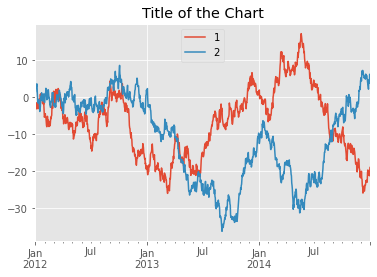

In [28]:
# change the position of the legend
ax = walk_df.plot(title='Title of the Chart')

# put the legend in the upper center of the chart
ax.legend(['1', '2'], loc='upper center');

Legends can also be turned off with the legend parameter:

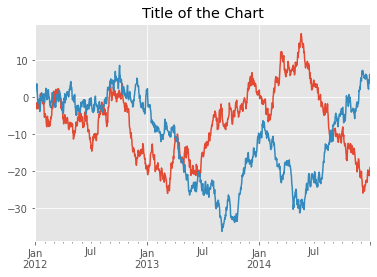

In [29]:
# omit the legend by using legend=False
walk_df.plot(title='Title of the Chart', legend=False);

<h4>Specifying line colors, styles, thickness, and markers</h4>

<p>pandas automatically sets the colors of each series on any chart. If you would like to
specify your own color, you can do so by supplying style code to the style parameter of
the plot function. pandas has a number of built-in single character code for colors, several
of which are listed here:</p>
    <ul>
<li>b: Blue</li>
<li>g: Green</li>
<li>r: Red</li>
<li>c: Cyan</li>
<li>m: Magenta</li>
<li>y: Yellow</li>
<li>k: Black</li>
<li>w: White</li>
    </ul>
    <p>It is also possible to specify the color using a hexadecimal RGB code of the #RRGGBB
format. To demonstrate both options, the following example sets the color of the first
series to green using a single digit code and the second series to red using the hexadecimal
code:</p>

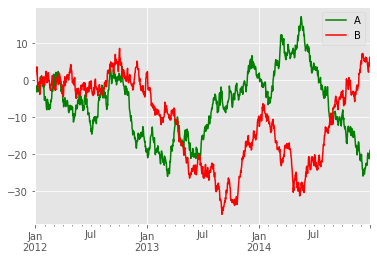

In [31]:
# change the line colors on the plot
# use character code for the first line,
# hex RGB for the second
walk_df.plot(style=['g', '#FF0000']);

<p>Line styles can be specified using a line style code. These can be used in combination with
the color style codes, following the color code. The following are examples of several
useful line style codes:</p>

<ul>
    <li>'-' = solid</li>
<li>'--' = dashed</li>
<li>':' = dotted</li>
<li>'-.' = dot-dashed</li>
<li>'.' = points</li>
    </ul><p>
The following plot demonstrates these five line styles by drawing five data series, each
with one of these styles. Notice how each style item now consists of a color symbol and a
line style code:</p>

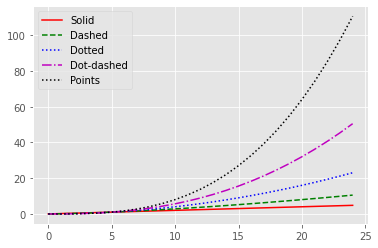

In [32]:
# show off different line styles
t = np.arange(0., 5., 0.2)
legend_labels = ['Solid', 'Dashed', 'Dotted', 'Dot-dashed', 'Points']

line_style = pd.DataFrame({0 : t, 1 : t**1.5,  2 : t**2.0, 3 : t**2.5, 4 : t**3.0})

# generate the plot, specifying color and line style for each line
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'])

# set the legend
ax.legend(legend_labels, loc='upper left');

The thickness of lines can be specified using the lw parameter of .plot(). This can be
passed a thickness for multiple lines, by passing a list of widths, or a single width that is
applied to all lines. The following redraws the graph with a line width of 3, making the
lines a little more pronounced:

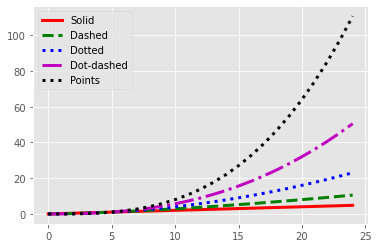

In [33]:
# regenerate the plot, specifying color and line style
# for each line and a line width of 3 for all lines
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'], lw=3)
ax.legend(legend_labels, loc='upper left');

Markers on a line can also be specified using abbreviations in the style code. There are
quite a few marker types provided and you can see them all at
http://matplotlib.org/api/markers_api.html. We will examine five of them in the following
chart by having each series use a different marker from the following: circles, stars,
triangles, diamonds, and points. The type of marker is also specified using a code at the
end of the style:

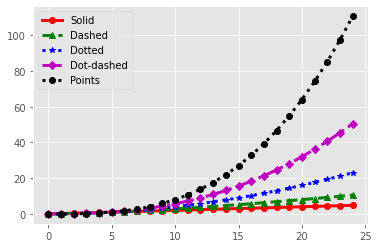

In [34]:
# redraw, adding markers to the lines
ax = line_style.plot(style=['r-o', 'g--^', 'b:*','m-.D', 'k:o'], lw=3)
ax.legend(legend_labels, loc='upper left');

<h4>Specifying tick mark locations and tick labels</h4>

<p>Every plot we have seen to this point, has used the default tick marks and labels on the
ticks that pandas decides are appropriate for the plot. These can also be customized using
various matplotlib functions.</p><p>
We will demonstrate how ticks are handled by first examining a simple DataFrame. We
can retrieve the locations of the ticks that were generated on the x axis using the
plt.xticks() method. This method returns two values, the location, and the actual labels:</p>

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

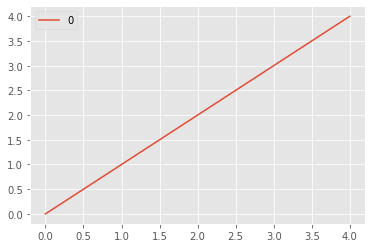

In [38]:
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
ticks, labels = plt.xticks()
ticks, labels

This array contains the locations of the ticks in units of the values along the x axis. pandas
has decided that a range of 0 through 4 (the min and max) and an interval of 0.5 is
appropriate. If we want to use other locations, we can provide these by passing them to
plt.xticks() as a list. The following demonstrates these using even integers from -1 to
5, which will both change the extents of the axis, as well as remove non integral labels:

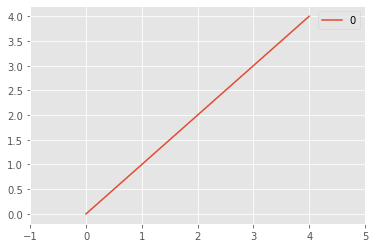

In [41]:
# resize x axis to (-1, 5), and draw ticks
# only at integer values
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
plt.xticks(np.arange(-1, 6));

Also, we can specify new labels at these locations by passing them as the second
parameter. Just as an example, we can change the y axis ticks and labels to integral values
and consecutive alpha characters using the following:

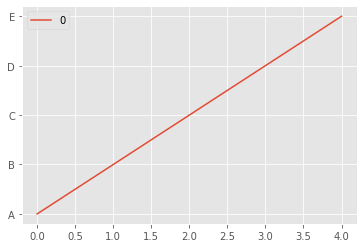

In [42]:
# rename y axis tick labels to A, B, C, D, and E
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
plt.yticks(np.arange(0, 5), list("ABCDE"));

<h4>Formatting axes tick date labels using formatters</h4>

<p>The formatting of axes labels whose underlying data types is datetime is performed using
locators and formatters. Locators control the position of the ticks, and the formatters
control the formatting of the labels.</p><p>
To facilitate locating ticks and formatting labels based on dates, matplotlib provides
several classes in maptplotlib.dates to help facilitate the process:</p>
<ul>
<li>MinuteLocator, HourLocator, DayLocator, WeekdayLocator, MonthLocator, and
YearLocator: These are specific locators coded to determine where ticks for each
    type of date field will be found on the axis</li>
<li>DateFormatter: This is a class that can be used to format date objects into labels on
    the axis</li>
    <p>
By default, the default locator and formatter are AutoDateLocator and
AutoDateFormatter, respectively. You can change these by providing different objects to
        use the appropriate methods on the specific axis object.</p>
To demonstrate, we will use a subset of the random walk data from earlier, which
represents just the data from January through February of 2014. Plotting this gives us the
following output:</p>

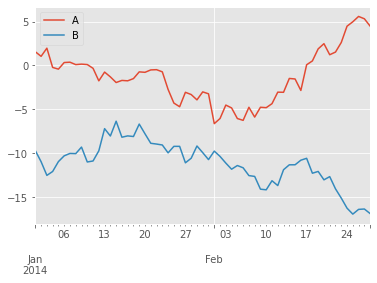

In [43]:
# plot January-February 2014 from the random walk
walk_df.loc['2014-01':'2014-02'].plot();

<p>The labels on the x axis of this plot have two series of labels, the minor and the major. The
minor labels in this plot contain the day of the month, and the major contains the year and
month (the year only for the first month). We can set locators and formatters for each of
the minor and major levels.</p><p>
This will be demonstrated by changing the minor labels to be located at the Monday of
each week and to contain the date and day of the week (right now, the chart uses weekly
and only Friday’s date—without the day name). On the major labels, we will use the
monthly location and always include both the month name and the year:</p>

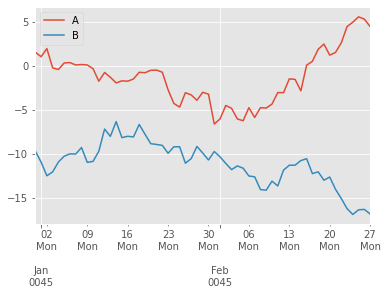

In [48]:
# this import styles helps us type less
from matplotlib.dates import WeekdayLocator,DateFormatter, MonthLocator

# plot Jan-Feb 2014
ax = walk_df.loc['2014-01':'2014-02'].plot()

# do the minor labels
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter("%d\n%a"))

# do the major labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));

<p>This is almost what we wanted. However, note that the year is being reported as 45. This,
unfortunately, seems to be an issue between pandas and the matplotlib representation of
values for the year. The best reference I have on this is this following link from Stack
Overflow (http://stackoverflow.com/questions/12945971/pandas-timeseries-plot-setting-xaxis-
major-and-minor-ticks-and-labels).</p><p>
So, it appears to create a plot with custom-date-based labels, we need to avoid the pandas
.plot() and need to kick all the way down to using matplotlib. Fortunately, this is not too
hard. The following changes the code slightly and renders what we wanted:</p>

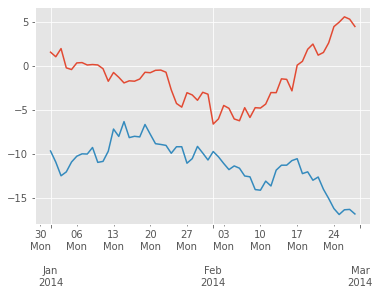

In [49]:
# this gets around the pandas / matplotlib year issue
# need to reference the subset twice, so let's make a variable
walk_subset = walk_df['2014-01':'2014-02']

# this gets the plot so we can use it, we can ignore fig
fig, ax = plt.subplots()

# inform matplotlib that we will use the following as dates
# note we need to convert the index to a pydatetime series
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

# do the minor labels
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))

# do the major labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));

To add grid lines for the minor axes ticks, you can use the .grid() method of the x axis
object of the plot, the first parameter specifying the lines to use and the second parameter
specifying the minor or major set of ticks. The following replots this graph without the
major grid line and with the minor grid lines:

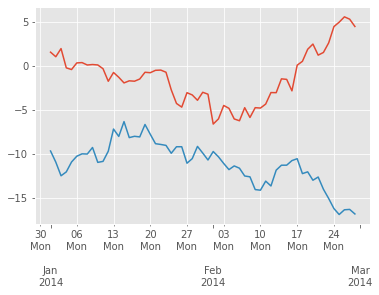

In [50]:
# this gets the plot so we can use it, we can ignore fig
fig, ax = plt.subplots()

# inform matplotlib that we will use the following as dates
# note we need to convert the index to a pydatetime series
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

# do the minor labels
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))
ax.xaxis.grid(True, "minor") # turn on minor tick grid lines
ax.xaxis.grid(False, "major") # turn off major tick grid lines

# do the major labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));

The last demonstration of formatting will use only the major labels but on a weekly basis
and using a YYYY-MM-DD format. However, because these would overlap, we will specify
that they should be rotated to prevent the overlap. This is done using the
fig.autofmt_xdate() function:

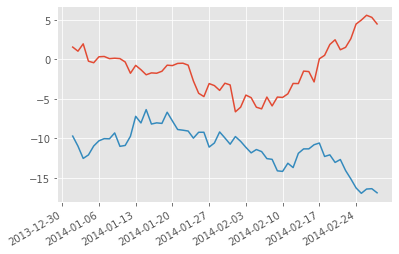

In [51]:
# this gets the plot so we can use it, we can ignore fig
fig, ax = plt.subplots()

# inform matplotlib that we will use the following as dates
# note we need to convert the index to a pydatetime series
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')
ax.xaxis.grid(True, "major") # turn off major tick grid lines

# do the major labels
ax.xaxis.set_major_locator(weekday_locator)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'));

# informs to rotate date labels
fig.autofmt_xdate();